This notebook looks at a directory of projection images and explores how we can interpolate between these images in the latents space

In [ ]:
%load_ext autoreload
%autoreload 2
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
import transects
from ganwrapper import Generator
from tqdm import tqdm
import sklearn.decomposition

import util
from config import *
G = Generator(image_size=512)

In [4]:
DIR_PROJECTIONS = 'samples/projected'
fnames = [f for f in os.listdir(DIR_PROJECTIONS)
          if '.npy' in f and not '02' in f]
latents = np.array([np.load(oj(DIR_PROJECTIONS, f)) for f in fnames])
vecs = {fnames[i][:-7]: latents[i].reshape(1, 18, 512) for i in range(len(fnames))}

# now let's manipulate the images

In [5]:
print(vecs.keys())
def g(x):
    return G.generateImageFromStyleFull(x)

dict_keys(['varun', 'pietro', 'yinuo3', 'malvika', 'alain', 'guha', 'yinuo_baby', 'amma', 'yinuo2', 'vishal', 'zartosht', 'kieran', 'gautam', 'jamie', 'jesse', 'yinuo', 'alex', 'raaz', 'phong', 'roy', 'andy', 'stan', 'alan', 'chan_baby', 'mom', 'chandan', 'roli', 'dad', 'matt'])


**interpolate past one image**

norms 63.31315 58.962353 75.80555


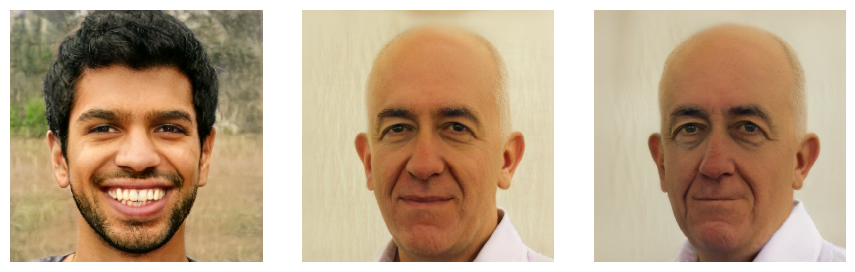

In [8]:
print('norms',
      np.linalg.norm(vecs['chandan'].flatten()),
      np.linalg.norm(vecs['pietro'].flatten()),
      np.linalg.norm(vecs['chandan'].flatten() - vecs['pietro'].flatten()))
ims = []
ims.append(g(vecs['chandan']))
ims.append(g(vecs['pietro']))
ims.append(g(
    (vecs['pietro'] - 0.3 * vecs['chandan']) / 1.3
             ))
util.plot_row(ims)

**add random noise, see if the images get corrupted**

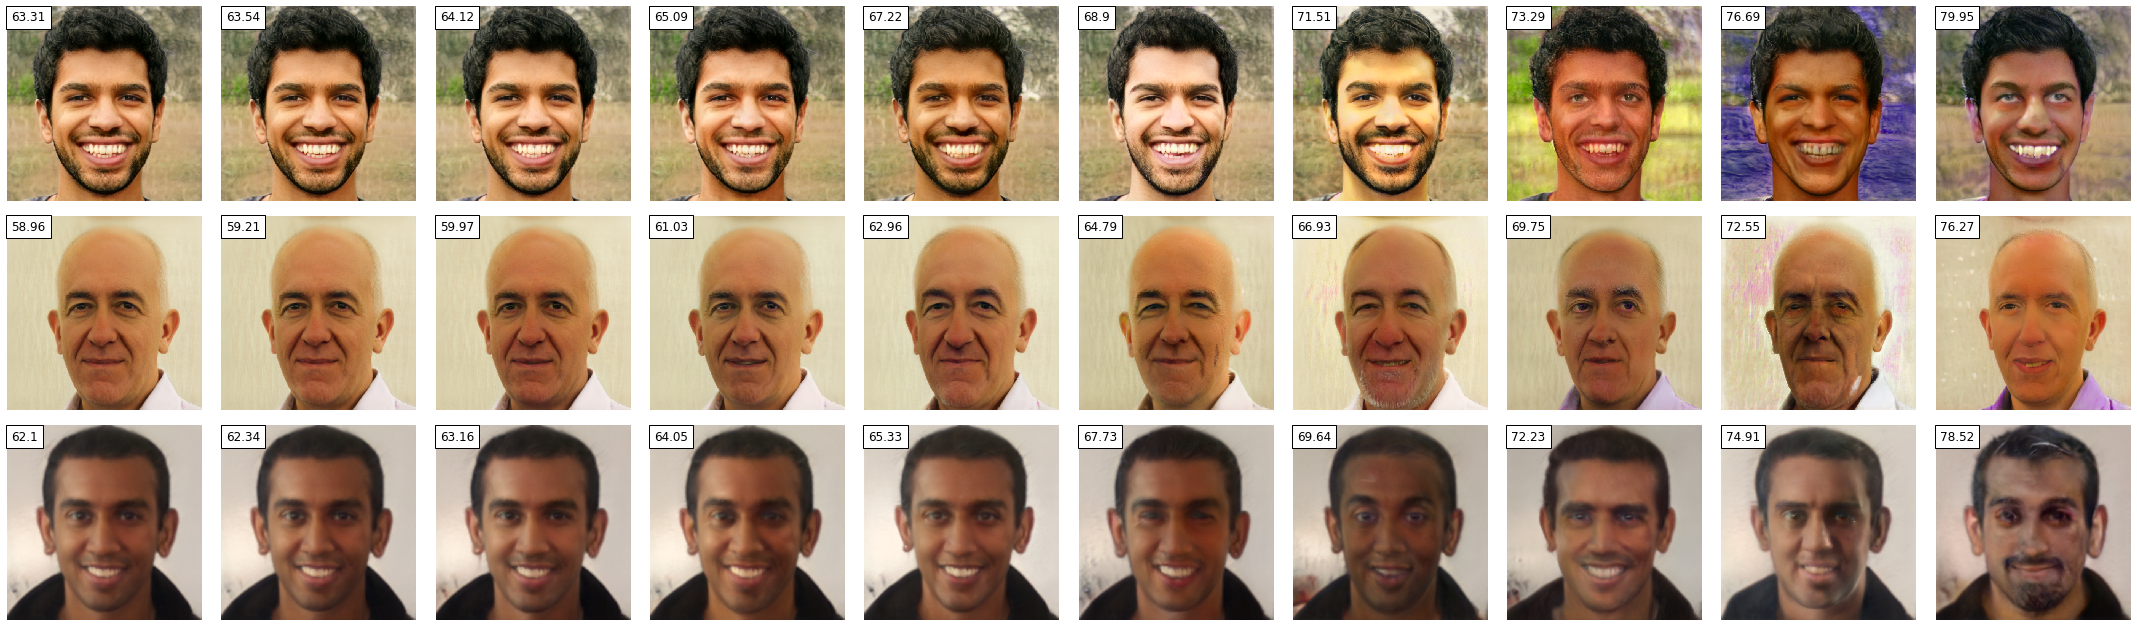

In [9]:
np.random.seed(42)
ims = []
annots = []
names = ['chandan', 'pietro', 'guha']
for name in names:
    for i in np.linspace(0, 0.5, 10):
        v = vecs[name]
        vnew = v + np.random.randn(*v.shape) * i
        ims.append(g(vnew))
        annots.append(np.linalg.norm(vnew.flatten()).round(2))
ims = np.array(ims)
util.plot_grid(np.array(ims).reshape(len(names), int(ims.shape[0] / len(names)),
                                    *ims.shape[2:]), annot_list=annots)
plt.show()

**move in pca dir**

In [39]:
fname_nps = [f for f in sorted(os.listdir(DIR_GEN)) if 'npy' in f] # these start at 00001
latents = np.array([np.load(oj(DIR_GEN, f)) for f in fname_nps])
lats = latents.reshape(latents.shape[0], -1)
m = sklearn.decomposition.PCA(random_state=42)
m.fit(lats[:1000])

(30, 1, 512, 512, 3)


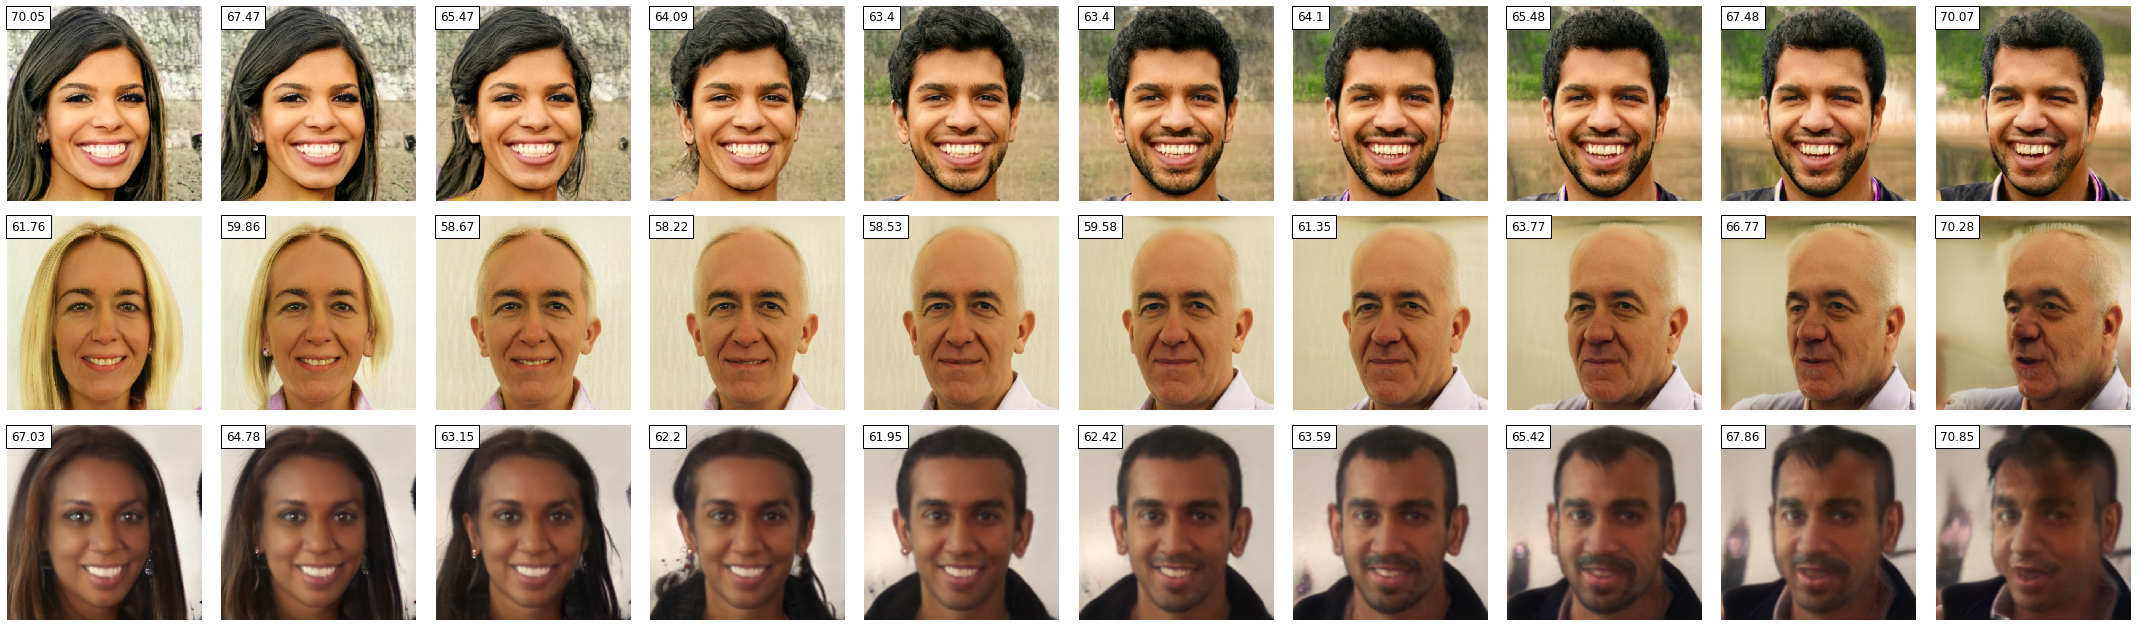

In [50]:
np.random.seed(42)
ims = []
annots = []
names = ['chandan', 'pietro', 'guha']
for name in names:
    for i in np.linspace(-30, 30, 10):
        v = vecs[name]
        vnew = (v.flatten() + i * dir1).reshape(v.shape)
        ims.append(g(vnew))
        annots.append(np.linalg.norm(vnew.flatten()).round(2))
ims = np.array(ims)
util.plot_grid(np.array(ims).reshape(len(names), int(ims.shape[0] / len(names)),
                                    *ims.shape[2:]), annot_list=annots)
plt.show()